## Plot histograms from Small Body Database (SBDB)

Calculations to inform:

* Distribution of asteroid masses (M)
* Velocity of asteroids (V_NEA)
* Velocity of LISA (V_LISA)
* Relative velocity (V)
* Distribution of impact parameter (D)

In [1]:
# Facts and tables from SBDB

# Number of asteroids
# Number of asteroids with mass
# Table of asteroids, their masses and errors (done this already for TMA01 in Excel)
# Binary systems (seperate API on satellites of asteroids)

In [2]:
import warnings
warnings.simplefilter('ignore', FutureWarning)
from pandas import *
import numpy as np
%matplotlib inline
from calendar import monthrange
from math import *
from ipynb.fs.defs import utils

In [3]:
# Read in SBDB from local file
# DtypeWarning: Columns (3,4,15,22,23,69) have mixed types.Specify dtype option on import or set low_memory=False.
SBDB_AAAA = read_csv('SBDB/sbdb_query_results_asteroids_AAAA_20220703.csv', low_memory=False)
SBDB_GMdefined = read_csv('SBDB/sbdb_query_results_all_GMdefined_20220703.csv', low_memory=False)

In [4]:
# Get SBDB from API documented at https://ssd-api.jpl.nasa.gov/doc/sbdb_query.html

In [5]:
SBDB_AAAA.head(10)

,spkid,full_name,pdes,name,prefix,neo,pha,H,G,M1,...,n_obs_used,n_del_obs_used,n_dop_obs_used,condition_code,rms,two_body,A1,A2,A3,DT
0,2000433,433 Eros (A898 PA),433,Eros,NaN,Y,N,10.31,0.46,NaN,...,9130,4.0,2.0,0.0,0.29796,NaN,NaN,NaN,NaN,NaN
1,2000719,719 Albert (A911 TB),719,Albert,NaN,Y,N,15.57,NaN,NaN,...,2016,NaN,NaN,0.0,0.40906,NaN,NaN,NaN,NaN,NaN
2,2000887,887 Alinda (A918 AA),887,Alinda,NaN,Y,N,13.84,-0.12,NaN,...,2652,NaN,NaN,0.0,0.40185,NaN,NaN,NaN,NaN,NaN
3,2001036,1036 Ganymed (A924 UB),1036,Ganymed,NaN,Y,N,9.23,0.30,NaN,...,7549,0.0,1.0,0.0,0.36681,NaN,NaN,NaN,NaN,NaN
4,2001221,1221 Amor (1932 EA1),1221,Amor,NaN,Y,N,17.38,NaN,NaN,...,585,NaN,NaN,0.0,0.44014,NaN,NaN,NaN,NaN,NaN
5,2001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,16.52,NaN,NaN,...,1093,10.0,13.0,0.0,0.34563,NaN,NaN,-3.000000e-15,NaN,NaN
6,2001580,1580 Betulia (1950 KA),1580,Betulia,NaN,Y,N,14.73,0.00,NaN,...,1374,5.0,6.0,0.0,0.51964,NaN,NaN,NaN,NaN,NaN
7,2001620,1620 Geographos (1951 RA),1620,Geographos,NaN,Y,Y,15.34,NaN,NaN,...,4789,3.0,4.0,0.0,0.34222,NaN,NaN,-3.100000e-15,NaN,NaN
8,2001627,1627 Ivar (1929 SH),1627,Ivar,NaN,Y,N,12.76,0.60,NaN,...,7792,3.0,1.0,0.0,0.35325,NaN,NaN,NaN,NaN,NaN
9,2001685,1685 Toro (1948 OA),1685,Toro,NaN,Y,N,14.31,NaN,NaN,...,3641,7.0,2.0,0.0,0.32031,NaN,NaN,-3.300000e-15,NaN,NaN


In [6]:
utils.describe_df(SBDB_AAAA)

,name,min,max,mean,var,sdev
0,spkid,2.000433e+06,5.428964e+07,1.563461e+07,4.688202e+14,2.165226e+07
1,H,9.230000e+00,3.320000e+01,2.324333e+01,8.610565e+00,2.934376e+00
2,G,-2.500000e-01,6.000000e-01,1.146154e-01,5.692692e-02,2.385936e-01
3,M1,NaN,NaN,NaN,NaN,NaN
4,M2,NaN,NaN,NaN,NaN,NaN
5,K1,NaN,NaN,NaN,NaN,NaN
6,K2,NaN,NaN,NaN,NaN,NaN
7,PC,NaN,NaN,NaN,NaN,NaN
8,diameter,2.500000e-03,3.767500e+01,1.032242e+00,2.725802e+00,1.651000e+00
9,albedo,9.000000e-03,8.560000e-01,1.725288e-01,2.074466e-02,1.440301e-01


In [7]:
# Documentation on columns
# https://ssd-api.jpl.nasa.gov/sbdb_query.api?info=fields

import requests
import json
response_info = json.loads(requests.get('https://ssd-api.jpl.nasa.gov/sbdb_query.api?info=field').text)

In [8]:
def get_fields(response_info):
    fields = []
    for ntdu in response_info:
        fields.append([ntdu['name'],ntdu['title'],ntdu['description'],ntdu['units']])
    dataframe = DataFrame(data=fields, columns=['Name', 'Title', 'Description', 'Units'])
    return dataframe

In [9]:
object_df = get_fields(response_info['info']['field']['object']['list'])
phys_par_df = get_fields(response_info['info']['field']['orbit']['list'])
orbit_df = get_fields(response_info['info']['field']['phys_par']['list'])

In [10]:
print('For all asteroids')
print(f"Number of asteroids defined = {SBDB_AAAA.shape[0]}")
print(f"Number of asteroids with defined mass = {SBDB_AAAA.dropna(subset=['GM']).shape[0]}")
print(f"Number of asteroids with defined diameter = {SBDB_AAAA.dropna(subset=['diameter']).shape[0]}")
# print(f"Number of asteroids with defined extent = {SBDB_AAAA.dropna(subset=['extent']).shape[0]}")
# print(f"Number of asteroids with defined albedo = {SBDB_AAAA.dropna(subset=['albedo']).shape[0]}")
# print(f"Number of asteroids with defined diameter and albedo = {SBDB_AAAA.dropna(subset=['diameter','albedo']).shape[0]}")
print(f"Number of asteroids with defined absolute magnitude H and albedo = {SBDB_AAAA.dropna(subset=['H','albedo']).shape[0]}")
print(f"Number of asteroids with defined absolute magnitude H = {SBDB_AAAA.dropna(subset=['H']).shape[0]}")

For all asteroids
Number of asteroids defined = 29205
Number of asteroids with defined mass = 5
Number of asteroids with defined diameter = 1248
Number of asteroids with defined absolute magnitude H and albedo = 1203
Number of asteroids with defined absolute magnitude H = 29200


In [11]:
# Data on sigma of GM from https://ssd.jpl.nasa.gov/tools/sbdb_lookup.html
data_sigma_GM = {'spkid':[
                    2000001,
                    2000002,
                    2000004,
                    2000010,
                    2000016,
                    2000022,
                    2000107,
                    2000243,
                    2000253,
                    2000433,
                    2000704,
                    2025143,
                    2101955,
                    2162173,
                    2185851,
                    ],
                 'sigma_GM':[
                    0.0009,
                    0.18,
                    0.000012,
                    0,
                    0.04,
                    0.05,
                    0.0022,
                    0.00035,
                    0.00030,
                    0.001e-4,
                    0,
                    0.063e-9,
                    0.0009e-9,
                    0.04e-8,
                    3e-9,
                    ]
                }
df_sigma_GM = DataFrame(data_sigma_GM)

# Merge dataframes on the SPKID
SBDB_with_mass = merge(SBDB_GMdefined, df_sigma_GM, on='spkid', how='inner')
G = 6.67408e-11 # google

# Calculate mass, converting from km^3 to m^3
SBDB_with_mass['M'] = SBDB_with_mass['GM']*1e3**3/G
SBDB_with_mass['sigma_M'] = SBDB_with_mass['sigma_GM']*1e3**3/G
SBDB_with_mass['sigma_over_M'] = SBDB_with_mass['sigma_GM']/SBDB_with_mass['GM']*100
SBDB_with_mass['log10(M)'] = SBDB_with_mass['M'].apply(log10)
df_output = SBDB_with_mass[['full_name','GM','sigma_GM','M','sigma_M','sigma_over_M','log10(M)']]
df_output.to_csv('SBDB/SBDB_with_mass.csv')
df_output

,full_name,GM,sigma_GM,M,sigma_M,sigma_over_M,log10(M)
0,1 Ceres (A801 AA),6.262840e+01,9.000000e-04,9.383825e+20,1.348500e+16,0.001437,20.972380
1,2 Pallas (A802 FA),1.363000e+01,1.800000e-01,2.042229e+20,2.697001e+18,1.320616,20.310104
2,4 Vesta (A807 FA),1.728824e+01,1.200000e-05,2.590356e+20,1.798001e+14,0.000069,20.413360
3,10 Hygiea (A849 GA),7.000000e+00,0.000000e+00,1.048834e+20,0.000000e+00,0.000000,20.020707
4,16 Psyche (A852 FA),1.530000e+00,4.000000e-02,2.292451e+19,5.993335e+17,2.614379,19.360300
5,22 Kalliope (A852 WA),4.910000e-01,5.000000e-02,7.356819e+18,7.491669e+17,10.183299,18.866690
6,107 Camilla (A868 WA),7.475000e-01,2.200000e-03,1.120005e+19,3.296334e+16,0.294314,19.049220
7,243 Ida (A884 SB),2.750000e-03,3.500000e-04,4.120418e+16,5.244168e+15,12.727273,16.614941
8,253 Mathilde (A885 VA),6.890000e-03,3.000000e-04,1.032352e+17,4.495002e+15,4.354136,17.013828
9,433 Eros (A898 PA),4.463000e-04,1.000000e-07,6.687064e+15,1.498334e+12,0.022406,15.825235


In [12]:
from lisaconstants import ASTRONOMICAL_UNIT, SPEED_OF_LIGHT
ASTRONOMICAL_UNIT, SPEED_OF_LIGHT

(149597870700.0, 299792458.0)

In [13]:
perihelion, aphelion = (0.9942402780791028, 1.0048137369425845) # calculated from lisa-orbits.ipynb from esa-orbits.h5
# perihelion, aphelion = (0.983, 1.017) # Earth from asteroid classifications
perihelion, aphelion

(0.9942402780791028, 1.0048137369425845)

In [14]:
SBDB_apollo = SBDB_AAAA[
    ((SBDB_AAAA.a > 1) & (SBDB_AAAA.q < aphelion)) 
]
SBDB_apollo.shape

(15275, 74)

In [15]:
SBDB_atens = SBDB_AAAA[
    ((SBDB_AAAA.a < 1) & (SBDB_AAAA.ad > perihelion)) 
]
SBDB_atens.shape

(2265, 74)

In [16]:
SBDB = SBDB_AAAA[
    ((SBDB_AAAA.a < 1) & (SBDB_AAAA.ad > perihelion)) |
    ((SBDB_AAAA.a > 1) & (SBDB_AAAA.q < aphelion))
]
SBDB.shape

(17540, 74)

In [17]:
print(f'About the Atens and Apollos:')
print(f"Number of asteroids defined = {SBDB.shape[0]}")
print(f"Number of asteroids with defined mass = {SBDB.dropna(subset=['GM']).shape[0]}")
print(f"Number of asteroids with defined diameter = {SBDB.dropna(subset=['diameter']).shape[0]}")
# print(f"Number of asteroids with defined extent = {SBDB.dropna(subset=['extent']).shape[0]}")
# print(f"Number of asteroids with defined albedo = {SBDB.dropna(subset=['albedo']).shape[0]}")
# print(f"Number of asteroids with defined diameter and albedo = {SBDB.dropna(subset=['diameter','albedo']).shape[0]}")
print(f"Number of asteroids with defined absolute magnitude H and albedo = {SBDB.dropna(subset=['H','albedo']).shape[0]}")
print(f"Number of asteroids with defined absolute magnitude H = {SBDB.dropna(subset=['H']).shape[0]}")
print(f"Number of asteroids with defined spectral class (SMASSII) = {SBDB.dropna(subset=['spec_B']).shape[0]}")
print(f"Number of asteroids with defined spectral class (Tholen) = {SBDB.dropna(subset=['spec_T']).shape[0]}")

About the Atens and Apollos:
Number of asteroids defined = 17540
Number of asteroids with defined mass = 4
Number of asteroids with defined diameter = 864
Number of asteroids with defined absolute magnitude H and albedo = 833
Number of asteroids with defined absolute magnitude H = 17538
Number of asteroids with defined spectral class (SMASSII) = 178
Number of asteroids with defined spectral class (Tholen) = 14


In [18]:
# Merge dataframes on the SPKID
SBDB_with_mass = merge(SBDB, df_sigma_GM, on='spkid', how='inner')
G = 6.67408e-11 # google

# Calculate mass, converting from km^3 to m^3
SBDB_with_mass['M'] = SBDB_with_mass['GM']*1e3**3/G
SBDB_with_mass['sigma_M'] = SBDB_with_mass['sigma_GM']*1e3**3/G
SBDB_with_mass['log10(M)'] = SBDB_with_mass['M'].apply(log10)
df_output = SBDB_with_mass[['full_name','GM','sigma_GM','M','sigma_M','log10(M)']]
df_output.to_csv('SBDB/LISA_crossing_asteroids_with_mass.csv')
df_output

,full_name,GM,sigma_GM,M,sigma_M,log10(M)
0,25143 Itokawa (1998 SF36),2.100000e-09,6.300000e-11,3.146501e+10,9.439503e+08,10.497828
1,101955 Bennu (1999 RQ36),4.890400e-09,9.000000e-13,7.327452e+10,1.348500e+07,10.864953
2,162173 Ryugu (1999 JU3),3.000000e-08,4.000000e-10,4.495002e+11,5.993335e+09,11.652730
3,185851 (2000 DP107),3.224000e-08,3.000000e-09,4.830628e+11,4.495002e+10,11.684004


In [19]:
# Calculate the mass of the asteroids with diameters defined
SBDB_with_size = SBDB.dropna(subset=['diameter'])
density = 2000. # kg m-3

def mass(diameter):
    radius_m = diameter*1.e3/2.
    volume = 4./3.*pi*radius_m**3
    mass = volume*density
    return mass

options.mode.chained_assignment = None
SBDB_with_size['M'] = SBDB_with_size['diameter'].apply(mass)
SBDB_with_size['log10(M)'] = SBDB_with_size['M'].apply(log10)
SBDB_with_size

,spkid,full_name,pdes,name,prefix,neo,pha,H,G,M1,...,n_dop_obs_used,condition_code,rms,two_body,A1,A2,A3,DT,M,log10(M)
5,2001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,16.52,NaN,NaN,...,13.0,0.0,0.34563,NaN,NaN,-3.000000e-15,NaN,NaN,1.047198e+12,12.020029
7,2001620,1620 Geographos (1951 RA),1620,Geographos,NaN,Y,Y,15.34,NaN,NaN,...,4.0,0.0,0.34222,NaN,NaN,-3.100000e-15,NaN,NaN,1.756906e+13,13.244749
9,2001685,1685 Toro (1948 OA),1685,Toro,NaN,Y,N,14.31,NaN,NaN,...,2.0,0.0,0.32031,NaN,NaN,-3.300000e-15,NaN,NaN,4.115905e+13,13.614465
10,2001862,1862 Apollo (1932 HA),1862,Apollo,NaN,Y,Y,16.11,0.09,NaN,...,9.0,0.0,0.46508,NaN,NaN,-3.800000e-15,NaN,NaN,3.534292e+12,12.548302
11,2001863,1863 Antinous (1948 EA),1863,Antinous,NaN,Y,N,15.44,NaN,NaN,...,NaN,0.0,0.48700,NaN,NaN,NaN,NaN,NaN,9.698097e+12,12.986687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15160,3762883,(2016 UH101),2016 UH101,NaN,NaN,Y,N,22.70,NaN,NaN,...,NaN,0.0,0.60214,NaN,NaN,NaN,NaN,NaN,2.196132e+09,9.341659
15162,3763097,(2016 UA107),2016 UA107,NaN,NaN,Y,N,20.80,NaN,NaN,...,NaN,8.0,0.62958,NaN,NaN,NaN,NaN,NaN,1.515328e+11,11.180507
15328,3764848,(2016 WF9),2016 WF9,NaN,NaN,Y,Y,20.08,NaN,NaN,...,NaN,0.0,0.53866,NaN,NaN,NaN,NaN,NaN,1.326510e+12,12.122710
15343,3765005,(2016 WN48),2016 WN48,NaN,NaN,Y,N,24.80,NaN,NaN,...,NaN,8.0,0.51295,NaN,NaN,NaN,NaN,NaN,3.126915e+09,9.495116


In [20]:
SBDB_with_size['M'].min()

16362.46173744684

In [21]:
SBDB_with_size['M'].max()

638581267781615.1

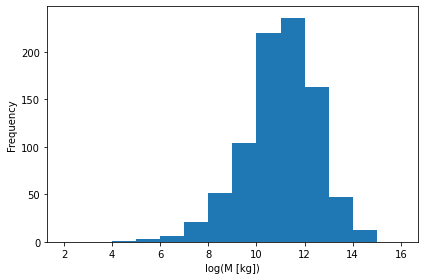

4.213848643990584 14.805216174744613 11.018709429495312


In [22]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, 
                        ncols=1, 
                        # sharex='col', 
                        sharey='row', 
                        squeeze=True, 
                        figsize=(6, 4))
plt.hist(SBDB_with_size['log10(M)'], bins=np.arange(2,17,1.0))
ax.set(ylabel = 'Frequency', xlabel = 'log(M [kg])')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.savefig('sbdb_with_diameter.png')
plt.show()
plt.close()
print(SBDB_with_size['log10(M)'].min(),SBDB_with_size['log10(M)'].max(),SBDB_with_size['log10(M)'].mean())

# bin = np.arange(3,9) # len + 1
# figure=plt.figure(1)
# plt.hist(log10(SBDB_with_size['M']),bins=bin, facecolor='blue',edgecolor='black')
# # shift ticks by .5
# plt.xticks(bin-.5, bin)
# plt.xlabel = 'evaluation'
# figure.ylabel = 'No of problems'
# plt.title = 'Evaluations Distribution Histogram'


In [23]:
# Calculate the mass of the asteroids with absolute magnitude and albedo defined
SBDB_with_Ha = SBDB.dropna(subset=['H','albedo'])

def diameter(H, albedo): # http://www.physics.sfasu.edu/astro/asteroids/sizemagnitude.html
    diameter = 1329./sqrt(albedo)*10.**(-0.2*H)
    return diameter # km

options.mode.chained_assignment = None
SBDB_with_Ha['M'] = SBDB_with_Ha[['H','albedo']].apply(lambda x: diameter(*x), axis=1).apply(mass)
SBDB_with_Ha['log10(M)'] = SBDB_with_Ha['M'].apply(log10)
SBDB_with_Ha

,spkid,full_name,pdes,name,prefix,neo,pha,H,G,M1,...,n_dop_obs_used,condition_code,rms,two_body,A1,A2,A3,DT,M,log10(M)
5,2001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,16.52,NaN,NaN,...,13.0,0.0,0.34563,NaN,NaN,-3.000000e-15,NaN,NaN,8.265104e+11,11.917248
7,2001620,1620 Geographos (1951 RA),1620,Geographos,NaN,Y,Y,15.34,NaN,NaN,...,4.0,0.0,0.34222,NaN,NaN,-3.100000e-15,NaN,NaN,9.840260e+12,12.993007
9,2001685,1685 Toro (1948 OA),1685,Toro,NaN,Y,N,14.31,NaN,NaN,...,2.0,0.0,0.32031,NaN,NaN,-3.300000e-15,NaN,NaN,3.694546e+13,13.567561
10,2001862,1862 Apollo (1932 HA),1862,Apollo,NaN,Y,Y,16.11,0.09,NaN,...,9.0,0.0,0.46508,NaN,NaN,-3.800000e-15,NaN,NaN,4.243200e+12,12.627694
11,2001863,1863 Antinous (1948 EA),1863,Antinous,NaN,Y,N,15.44,NaN,NaN,...,NaN,0.0,0.48700,NaN,NaN,NaN,NaN,NaN,1.138379e+13,13.056287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15160,3762883,(2016 UH101),2016 UH101,NaN,NaN,Y,N,22.70,NaN,NaN,...,NaN,0.0,0.60214,NaN,NaN,NaN,NaN,NaN,9.570104e+08,8.980917
15162,3763097,(2016 UA107),2016 UA107,NaN,NaN,Y,N,20.80,NaN,NaN,...,NaN,8.0,0.62958,NaN,NaN,NaN,NaN,NaN,1.491286e+11,11.173561
15328,3764848,(2016 WF9),2016 WF9,NaN,NaN,Y,Y,20.08,NaN,NaN,...,NaN,0.0,0.53866,NaN,NaN,NaN,NaN,NaN,1.484870e+12,12.171689
15343,3765005,(2016 WN48),2016 WN48,NaN,NaN,Y,N,24.80,NaN,NaN,...,NaN,8.0,0.51295,NaN,NaN,NaN,NaN,NaN,3.240437e+09,9.510604


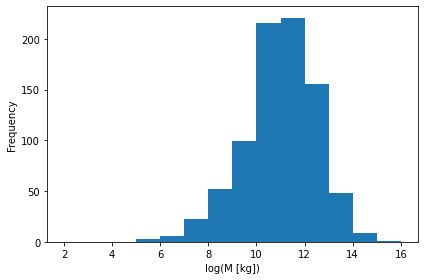

5.740777160700756 15.156466672219144 11.011379358262724


In [24]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, 
                        ncols=1, 
                        # sharex='col', 
                        sharey='row', 
                        squeeze=True, 
                        figsize=(6, 4))
plt.hist(SBDB_with_Ha['log10(M)'], bins=np.arange(2,17,1.0))
ax.set(ylabel = 'Frequency', xlabel = 'log(M [kg])')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.savefig('sbdb_with_Ha.png')
plt.show()
plt.close()

print(SBDB_with_Ha['log10(M)'].min(), SBDB_with_Ha['log10(M)'].max(), SBDB_with_Ha['log10(M)'].mean())

In [25]:
# Calculate the mass of the asteroids with absolute magnitude and albedo defined
SBDB_with_H = SBDB.dropna(subset=['H'])

albedo_default = 0.2

def diameter(H): # with default albedo
    diameter = 1329./sqrt(albedo_default)*10.**(-0.2*H)
    return diameter # km

options.mode.chained_assignment = None
SBDB_with_H['M'] = SBDB_with_H[['H']].apply(diameter).apply(mass)
SBDB_with_H['log10(M)'] = SBDB_with_H['M'].apply(log10)
SBDB_with_H

,spkid,full_name,pdes,name,prefix,neo,pha,H,G,M1,...,n_dop_obs_used,condition_code,rms,two_body,A1,A2,A3,DT,M,log10(M)
5,2001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,16.52,NaN,NaN,...,13.0,0.0,0.34563,NaN,NaN,-3.000000e-15,NaN,NaN,3.365570e+12,12.527059
7,2001620,1620 Geographos (1951 RA),1620,Geographos,NaN,Y,Y,15.34,NaN,NaN,...,4.0,0.0,0.34222,NaN,NaN,-3.100000e-15,NaN,NaN,1.718140e+13,13.235059
9,2001685,1685 Toro (1948 OA),1685,Toro,NaN,Y,N,14.31,NaN,NaN,...,2.0,0.0,0.32031,NaN,NaN,-3.300000e-15,NaN,NaN,7.129492e+13,13.853059
10,2001862,1862 Apollo (1932 HA),1862,Apollo,NaN,Y,Y,16.11,0.09,NaN,...,9.0,0.0,0.46508,NaN,NaN,-3.800000e-15,NaN,NaN,5.930053e+12,12.773059
11,2001863,1863 Antinous (1948 EA),1863,Antinous,NaN,Y,N,15.44,NaN,NaN,...,NaN,0.0,0.48700,NaN,NaN,NaN,NaN,NaN,1.496437e+13,13.175059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29195,54289574,(2022 ML3),2022 ML3,NaN,NaN,Y,N,27.09,NaN,NaN,...,NaN,6.0,0.59314,NaN,NaN,NaN,NaN,NaN,1.531294e+06,6.185059
29199,54289578,(2022 MP3),2022 MP3,NaN,NaN,Y,N,24.17,NaN,NaN,...,NaN,8.0,0.30878,NaN,NaN,NaN,NaN,NaN,8.650846e+07,7.937059
29201,54289580,(2022 MS3),2022 MS3,NaN,NaN,Y,N,22.40,NaN,NaN,...,NaN,9.0,0.49340,NaN,NaN,NaN,NaN,NaN,9.978346e+08,8.999059
29203,54289640,(2022 MZ3),2022 MZ3,NaN,NaN,Y,N,23.32,NaN,NaN,...,NaN,9.0,0.31857,NaN,NaN,NaN,NaN,NaN,2.799359e+08,8.447059


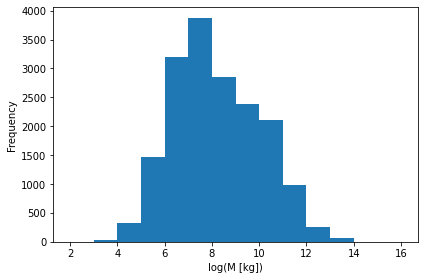

2.519058567306694 14.969058567306694 8.211131779759652


In [26]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, 
                        ncols=1, 
                        # sharex='col', 
                        sharey='row', 
                        squeeze=True, 
                        figsize=(6, 4))
plt.hist(SBDB_with_H['log10(M)'], bins=np.arange(2,17,1.0))
ax.set(ylabel = 'Frequency', xlabel = 'log(M [kg])')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.savefig('sbdb_with_H.png')
plt.show()
plt.close()
print(SBDB_with_H['log10(M)'].min(), SBDB_with_H['log10(M)'].max(), SBDB_with_H['log10(M)'].mean())

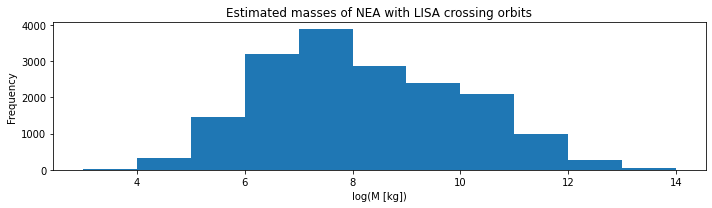

2.519058567306694 14.969058567306694 8.211131779759652


In [27]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, 
                        ncols=1, 
                        # sharex='col', 
                        sharey='row', 
                        squeeze=True, 
                        figsize=(10, 3))
plt.hist(SBDB_with_H['log10(M)'], bins=np.arange(3,15,1.0))
ax.set(ylabel = 'Frequency', xlabel = 'log(M [kg])', title = 'Estimated masses of NEA with LISA crossing orbits')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.savefig('sbdb_with_H_stretched.png')
plt.show()
plt.close()
print(SBDB_with_H['log10(M)'].min(), SBDB_with_H['log10(M)'].max(), SBDB_with_H['log10(M)'].mean())

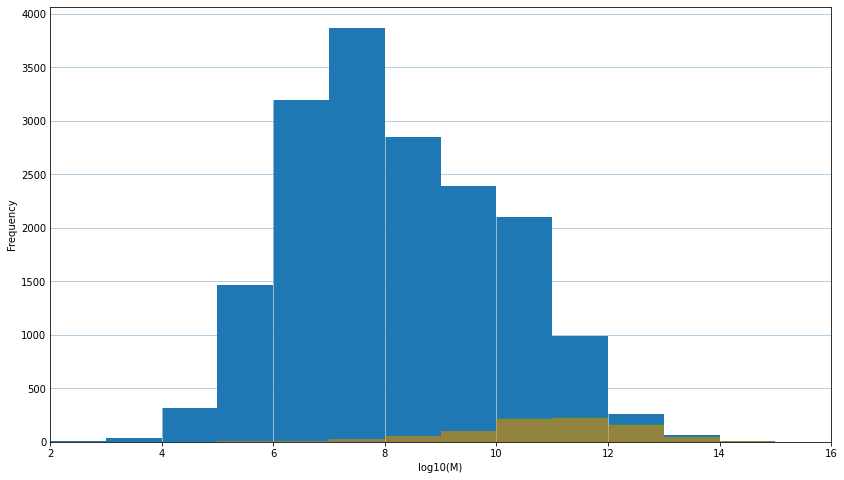

In [29]:
import matplotlib.pyplot as plt

# histograms
# https://towardsdatascience.com/histograms-with-pythons-matplotlib-b8b768da9305

facecolor = '#FFFFFF'
color_bars = '#1F77B4' # default bars colour
txt_color1 = '#252525'
txt_color2 = '#004C74'

data1=SBDB_with_H['log10(M)']
data2=SBDB_with_Ha['log10(M)']
data3=SBDB_with_size['log10(M)']

bins=np.arange(2,17,1.0)
fig, ax = plt.subplots(1, figsize=(14,8), facecolor=facecolor)
ax.set_facecolor(facecolor)

# plotting as a percentage of population
# https://stackoverflow.com/questions/51473993/plot-an-histogram-with-y-axis-as-percentage-using-funcformatter
# Standard tableau colours: https://matplotlib.org/stable/tutorials/colors/colors.html
n, bins1, patches = plt.hist(data1, bins=bins, alpha=1, color='tab:blue')
n, bins2, patches = plt.hist(data2,  bins=bins, alpha=0.5, color='tab:orange', zorder=2)
n, bins3, patches = plt.hist(data3, bins=bins, alpha=0.5, color='tab:green')

# from matplotlib.ticker import PercentFormatter
# plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    # Plot histogram
# data1.plot(kind = "hist", weights=np.ones(len(data1)) / len(data1), alpha = 0.65, bins = bins) # change density to true, because KDE uses density
# data2.plot(kind = "hist", weights=np.ones(len(data2)) / len(data2), alpha = 0.65, bins = bins)
# data3.plot(kind = "hist", weights=np.ones(len(data3)) / len(data3), alpha = 0.65, bins = bins)
    # Plot KDE
# data.plot(kind = "kde")

#grid
plt.grid(axis='y', color=color_bars, lw = 0.5, alpha=0.7)
plt.grid(axis='x', color=facecolor, lw = 0.5)

#remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='y', which='both',length=0) # use axis='both' to turn off tick marks on both axes

# Hide the right and top spines
# ax.spines['bottom'].set_visible(True)
# ax.spines['left'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_position(('outward', 10))

# plt.xticks(c=txt_color1, fontsize=12)
# plt.yticks(c=txt_color1, fontsize=12)

# showing quantiles 
# https://towardsdatascience.com/take-your-histograms-to-the-next-level-using-matplotlib-5f093ad7b9d3
# quant_5, quant_25, quant_50, quant_75, quant_95 = data1.quantile(0.05), data1.quantile(0.25), data1.quantile(0.5), data1.quantile(0.75), data1.quantile(0.95)
# quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# for i in quants:
#     ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color=txt_color1)

# X
ax.set_xlabel("log10(M)")
    # Limit x range to 0-4
x_start, x_end = 2, 16
ax.set_xlim(x_start, x_end)

# Y
# ax.set_ylim(0, 1)
# ax.set_yticklabels([])
ax.set_ylabel("Frequency")

# ax.text(quant_5-.1, 0.17, "5th", size = 10, alpha = 0.8)
# ax.text(quant_25-.13, 0.27, "25th", size = 11, alpha = 0.85)
# ax.text(quant_50-.13, 0.37, "50th", size = 12, alpha = 1)
# ax.text(quant_75-.13, 0.47, "75th", size = 11, alpha = 0.85)
# ax.text(quant_95-.25, 3800, "95th Percentile", size = 10, alpha =.8)

# plt.title('Histogram of Space Missions Dates\n', loc = 'center', fontsize = 20, c=txt_color1)
# plt.xlabel('log10(M)', c=txt_color1, fontsize=14)
# plt.ylabel('Frequency', c=txt_color1, fontsize=14)
# plt.tight_layout()
# plt.savefig('hist.png', facecolor=facecolor)
plt.show()

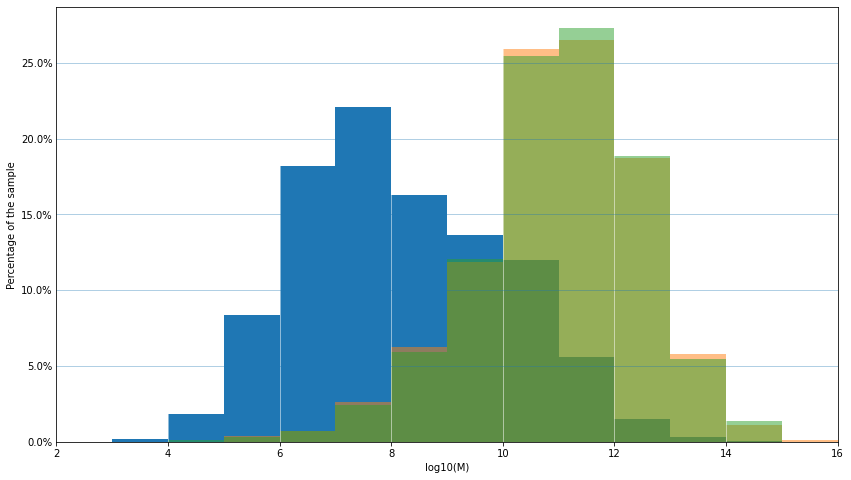

In [30]:
import matplotlib.pyplot as plt

# histograms
# https://towardsdatascience.com/histograms-with-pythons-matplotlib-b8b768da9305

facecolor = '#FFFFFF'
color_bars = '#1F77B4' # default bars colour
txt_color1 = '#252525'
txt_color2 = '#004C74'

data1=SBDB_with_H['log10(M)']
data2=SBDB_with_Ha['log10(M)']
data3=SBDB_with_size['log10(M)']

bins=np.arange(2,17,1.0)
fig, ax = plt.subplots(1, figsize=(14,8), facecolor=facecolor)
ax.set_facecolor(facecolor)

# plotting as a percentage of population
# https://stackoverflow.com/questions/51473993/plot-an-histogram-with-y-axis-as-percentage-using-funcformatter
# Standard tableau colours: https://matplotlib.org/stable/tutorials/colors/colors.html
n, bins1, patches = plt.hist(data1, weights=np.ones(len(data1)) / len(data1), bins=bins, alpha=1, color='tab:blue')
n, bins2, patches = plt.hist(data2, weights=np.ones(len(data2)) / len(data2), bins=bins, alpha=0.5, color='tab:orange')
n, bins3, patches = plt.hist(data3, weights=np.ones(len(data3)) / len(data3), bins=bins, alpha=0.5, color='tab:green')

from matplotlib.ticker import PercentFormatter
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

    # Plot histogram
# data1.plot(kind = "hist", weights=np.ones(len(data1)) / len(data1), alpha = 0.65, bins = bins) # change density to true, because KDE uses density
# data2.plot(kind = "hist", weights=np.ones(len(data2)) / len(data2), alpha = 0.65, bins = bins)
# data3.plot(kind = "hist", weights=np.ones(len(data3)) / len(data3), alpha = 0.65, bins = bins)
    # Plot KDE
# data.plot(kind = "kde")

#grid
plt.grid(axis='y', color=color_bars, lw = 0.5, alpha=0.7)
plt.grid(axis='x', color=facecolor, lw = 0.5)

#remove major and minor ticks from the x axis, but keep the labels
ax.tick_params(axis='y', which='both',length=0) # use axis='both' to turn off tick marks on both axes

# Hide the right and top spines
# ax.spines['bottom'].set_visible(True)
# ax.spines['left'].set_visible(True)
# ax.spines['right'].set_visible(False)
# ax.spines['top'].set_visible(False)
# ax.spines['left'].set_position(('outward', 10))

# plt.xticks(c=txt_color1, fontsize=12)
# plt.yticks(c=txt_color1, fontsize=12)

# showing quantiles 
# https://towardsdatascience.com/take-your-histograms-to-the-next-level-using-matplotlib-5f093ad7b9d3
# quant_5, quant_25, quant_50, quant_75, quant_95 = data1.quantile(0.05), data1.quantile(0.25), data1.quantile(0.5), data1.quantile(0.75), data1.quantile(0.95)
# quants = [[quant_5, 0.6, 0.16], [quant_25, 0.8, 0.26], [quant_50, 1, 0.36],  [quant_75, 0.8, 0.46], [quant_95, 0.6, 0.56]]
# for i in quants:
#     ax.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color=txt_color1)

# X
ax.set_xlabel("log10(M)")
    # Limit x range to 0-4
x_start, x_end = 2, 16
ax.set_xlim(x_start, x_end)

# Y
# ax.set_ylim(0, 1)
# ax.set_yticklabels([])
ax.set_ylabel("Percentage of the sample")

# ax.text(quant_5-.1, 0.17, "5th", size = 10, alpha = 0.8)
# ax.text(quant_25-.13, 0.27, "25th", size = 11, alpha = 0.85)
# ax.text(quant_50-.13, 0.37, "50th", size = 12, alpha = 1)
# ax.text(quant_75-.13, 0.47, "75th", size = 11, alpha = 0.85)
# ax.text(quant_95-.25, 3800, "95th Percentile", size = 10, alpha =.8)

# plt.title('Histogram of Space Missions Dates\n', loc = 'center', fontsize = 20, c=txt_color1)
# plt.xlabel('log10(M)', c=txt_color1, fontsize=14)
# plt.ylabel('Frequency', c=txt_color1, fontsize=14)
# plt.tight_layout()
# plt.savefig('hist.png', facecolor=facecolor)
plt.show()

In [31]:
# Velocities of NEA!
GM_sun = 1.32712440018E20 # m3 s-2
AU = 1.495978707E11 # m from google

def velocity_at_1AU(a):
    # https://en.wikipedia.org/wiki/Orbital_speed#Instantaneous_orbital_speed
    # known as the vis-viva equation
    v = sqrt(abs(GM_sun*(2./AU - 1./(a*AU))))
    return v

In [32]:
SBDB_with_a = SBDB.dropna(subset=['a'])
# SBDB_with_a[SBDB_with_a['a'] != 0]

SBDB_with_a['v'] = SBDB_with_a['a'].apply(velocity_at_1AU)
SBDB_with_a


,spkid,full_name,pdes,name,prefix,neo,pha,H,G,M1,...,n_del_obs_used,n_dop_obs_used,condition_code,rms,two_body,A1,A2,A3,DT,v
5,2001566,1566 Icarus (1949 MA),1566,Icarus,NaN,Y,Y,16.52,NaN,NaN,...,10.0,13.0,0.0,0.34563,NaN,NaN,-3.000000e-15,NaN,NaN,30843.428513
7,2001620,1620 Geographos (1951 RA),1620,Geographos,NaN,Y,Y,15.34,NaN,NaN,...,3.0,4.0,0.0,0.34222,NaN,NaN,-3.100000e-15,NaN,NaN,32592.562081
9,2001685,1685 Toro (1948 OA),1685,Toro,NaN,Y,N,14.31,NaN,NaN,...,7.0,2.0,0.0,0.32031,NaN,NaN,-3.300000e-15,NaN,NaN,33552.502913
10,2001862,1862 Apollo (1932 HA),1862,Apollo,NaN,Y,Y,16.11,0.09,NaN,...,8.0,9.0,0.0,0.46508,NaN,NaN,-3.800000e-15,NaN,NaN,34222.472836
11,2001863,1863 Antinous (1948 EA),1863,Antinous,NaN,Y,N,15.44,NaN,NaN,...,NaN,NaN,0.0,0.48700,NaN,NaN,NaN,NaN,NaN,37169.174267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29195,54289574,(2022 ML3),2022 ML3,NaN,NaN,Y,N,27.09,NaN,NaN,...,NaN,NaN,6.0,0.59314,NaN,NaN,NaN,NaN,NaN,29323.701239
29199,54289578,(2022 MP3),2022 MP3,NaN,NaN,Y,N,24.17,NaN,NaN,...,NaN,NaN,8.0,0.30878,NaN,NaN,NaN,NaN,NaN,35789.086337
29201,54289580,(2022 MS3),2022 MS3,NaN,NaN,Y,N,22.40,NaN,NaN,...,NaN,NaN,9.0,0.49340,NaN,NaN,NaN,NaN,NaN,36170.806366
29203,54289640,(2022 MZ3),2022 MZ3,NaN,NaN,Y,N,23.32,NaN,NaN,...,NaN,NaN,9.0,0.31857,NaN,NaN,NaN,NaN,NaN,37226.952409


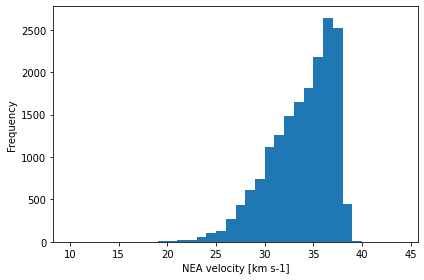

15609.911984129525 41525.42629894504 33802.54361640225


In [33]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, 
                        ncols=1, 
                        # sharex='col', 
                        sharey='row', 
                        squeeze=True, 
                        figsize=(6, 4))
plt.hist(SBDB_with_a['v']/1e3, bins=np.arange(10,45,1))
ax.set(ylabel = 'Frequency', xlabel = 'NEA velocity [km s-1]')
fig.patch.set_alpha(1)
fig.tight_layout()
plt.savefig('sbdb_velocity.png')
plt.show()
plt.close()

print(SBDB_with_a['v'].min(), SBDB_with_a['v'].max(), SBDB_with_a['v'].mean())